In [1]:
import numpy as np
import pandas as pd
import re


In [2]:
#read in the csv file
airbnbdf = pd.read_csv('airBnb_Paris2020-3-21.csv', delimiter=',', names=["house_title", "house_type", "price", "user", "no_of_ratings", "rating", "house_detail"])
airbnbdf.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail
137,♥ Charmant Appartement proche Opéra/Garnier - 6P,Entire home,€180,Charles,NaN,NaN,"['6 guests', '1 bedroom', '3 beds', '1.5 baths..."
275,Paris - Tours Eiffel - Disneyland 2,Private room in apartment,€32,Didier,(7 reviews),4.86,"['2 guests', '1 bedroom', '1 bed', '1 bath', '..."
244,City Center Beaubourg 1BD 6 people,Entire home,€190,Gilian,(266 reviews),4.76,"['6 guests', '1 bedroom', '3 beds', '1 bath', ..."
36,"Paris 10, Sampaix, Gare de l'EST, Gare du NORD",Entire home,€185,Gary,(4 reviews),5.00,"['7 guests', '3 bedrooms', '4 beds', '1 bath',..."
105,"Jolie Appartement, avec vue sur la tour Eiffel",Entire home,€84,Mohamed,(91 reviews),4.87,"['2 guests', '1 bedroom', '1 bed', '1 bath', '..."


In [3]:
#verify the datatypes
airbnbdf.dtypes

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
dtype: object

In [4]:
airbnbdf.price = airbnbdf.price.astype(str)
airbnbdf.no_of_ratings = airbnbdf.no_of_ratings.astype(str)


In [5]:
def remove_special_chars(val):
    new_val = re.findall('[0-9]',val)
    return "".join(new_val)

In [6]:
#price
airbnbdf.price = airbnbdf.price.apply(remove_special_chars)
print(airbnbdf.price.head(5))


0     53
1     79
2     17
3    131
4     35
Name: price, dtype: object


In [7]:
#number of ratings
airbnbdf.no_of_ratings = airbnbdf.no_of_ratings.apply(remove_special_chars)
print(airbnbdf.no_of_ratings.head(5))

0    176
1    331
2    389
3       
4    146
Name: no_of_ratings, dtype: object


In [8]:
def split_to_list(str_val):
    return str_val.split(",")

In [9]:
airbnbdf['house_details'] = airbnbdf.house_detail.apply(split_to_list)
airbnbdf.house_details.sample(5)

298    [['2 guests',  '1 bedroom',  '1 bed',  '1 bath...
188    [['2 guests',  'Studio',  '1 bed',  '1 bath', ...
27     [['3 guests',  'Studio',  '2 beds',  '1 bath',...
166    [['16+ guests',  '8 bedrooms',  '8 beds',  '2 ...
205    [['2 guests',  'Studio',  '1 bed',  '1 bath', ...
Name: house_details, dtype: object

In [10]:
len(airbnbdf)
airbnbdf.house_details[0][0]


"['2 guests'"

In [11]:
airbnbdf = airbnbdf.assign(no_of_guest=airbnbdf.price.mean(), house_size=airbnbdf.price.mean(), no_of_beds = airbnbdf.price.mean(), no_of_baths=airbnbdf.price.mean())


In [12]:
for i in range(len(airbnbdf)):
    try:

        airbnbdf.no_of_guest[i] = airbnbdf.house_details[i][0]
        airbnbdf.house_size[i]  = airbnbdf.house_details[i][1]
        airbnbdf.no_of_beds[i]  = airbnbdf.house_details[i][2]
        airbnbdf.no_of_baths[i]  = airbnbdf.house_details[i][3]
        
    except:
        continue

/home/laclac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/laclac/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/laclac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [13]:
print(airbnbdf.dtypes)
airbnbdf.head(30)

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
house_details     object
no_of_guest       object
house_size        object
no_of_beds        object
no_of_baths       object
dtype: object


,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths
0,Spacious studio near Bastille,Entire home,53,Alice Et Issam,176,3.88,"['2 guests', 'Studio', '1 bed', '1 bath', '\U0...","[['2 guests', 'Studio', '1 bed', '1 bath', ...",['2 guests','Studio','1 bed','1 bath'
1,Two rooms 45 m2 with terrace.,Entire home,79,Muriel,331,4.82,"['4 guests', '1 bedroom', '3 beds', '1 bath', ...","[['4 guests', '1 bedroom', '3 beds', '1 bat...",['4 guests','1 bedroom','3 beds','1 bath'
2,"Espace partagé, Shared space",Shared room in apartment,17,Jonathan,389,4.53,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",['2 guests','1 bedroom','1 bed','1 shared bath'
3,Family Room near Palais Royal & Louvre Museum,Room in boutique hotel,131,Normandy Hôtel,,NaN,"['4 guests', '2 bedrooms', '2 beds', '2 shared...","[['4 guests', '2 bedrooms', '2 beds', '2 sh...",['4 guests','2 bedrooms','2 beds','2 shared baths'
4,Jolie chambre mansardée,Private room in apartment,35,Thierry,146,4.70,"['1 guest', '1 bedroom', '1 bed', '1 shared ba...","[['1 guest', '1 bedroom', '1 bed', '1 share...",['1 guest','1 bedroom','1 bed','1 shared bath'
5,Amazing 4 Star**** Room PARIS near Eiffel Tower,Private room in apartment,,Roxane,486,4.74,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",['2 guests','1 bedroom','1 bed','1 private bath'
6,Cozy apartment in Central Paris,Entire home,92,Pelis,22,4.55,"['3 guests', '1 bedroom', '2 beds', '1.5 baths...","[['3 guests', '1 bedroom', '2 beds', '1.5 b...",['3 guests','1 bedroom','2 beds','1.5 baths'
7,Joli studio confortable proche de Porte d’Italie,Entire home,26,Estelle,5,5.00,"['2 guests', 'Studio', '1 bed', '1 bath', '\U0...","[['2 guests', 'Studio', '1 bed', '1 bath', ...",['2 guests','Studio','1 bed','1 bath'
8,Bedroom in the Haut Marais,Private room in apartment,59,India,184,4.87,"['2 guests', '1 bedroom', '1 bed', '1.5 shared...","[['2 guests', '1 bedroom', '1 bed', '1.5 sh...",['2 guests','1 bedroom','1 bed','1.5 shared baths'
9,"Coeur de Paris ,Marais, Chatelet",Entire home,55,Cynthia,,NaN,"['2 guests', 'Studio', '1 bed', '1 bath', '\U0...","[['2 guests', 'Studio', '1 bed', '1 bath', ...",['2 guests','Studio','1 bed','1 bath'


In [14]:
#number of guests
airbnbdf.no_of_guest = airbnbdf.no_of_guest.apply(remove_special_chars)
print(airbnbdf.no_of_guest.head(5))

0    2
1    4
2    2
3    4
4    1
Name: no_of_guest, dtype: object


In [15]:
print(sum(airbnbdf.house_size.isna()))

print(sum(airbnbdf.house_size.isnull()))

0
0


In [16]:
def convert_chars(val):
   ##studio is tagged as 0.5 bedroom
    if val == " 'Studio'":
        new_val = '0.5'
    else:
        new_val = re.findall('[0-9]',val)
    
    return "".join(new_val)

def remove_chars(val):
    new_val = re.findall('[0-9.]+',val)
    return "".join(new_val)

In [17]:
airbnbdf.house_size = airbnbdf.house_size.astype(str)

airbnbdf = airbnbdf.assign(house=airbnbdf.house_size.apply(convert_chars))

airbnbdf.sample(5)


,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house
118,La Louisiane the heart of Saint-Germain des Prés,Room in boutique hotel,,Xavier,124,4.59,"['16+ guests', '50 bedrooms', '50 beds', '50 b...","[['16+ guests', '50 bedrooms', '50 beds', '...",16,'50 bedrooms','50 beds','50 baths',50
280,A FULLY private FLOOR WITH 6 ROOMS FOR 12 PEOPLE,Private room,400,Green Hotels Paris 13,16,4.31,"['12 guests', '6 bedrooms', '8 beds', '6 baths...","[['12 guests', '6 bedrooms', '8 beds', '6 b...",12,'6 bedrooms','8 beds','6 baths',6
71,Centre paris,Entire home,193,Anna,4,4.75,"['8 guests', '2 bedrooms', '4 beds', '1 bath',...","[['8 guests', '2 bedrooms', '4 beds', '1 ba...",8,'2 bedrooms','4 beds','1 bath',2
90,Chambre calme dans un logement neuf,Private room in condominium,27,Ludivine,10,4.90,"['1 guest', '1 bedroom', '1 bed', '1 shared ba...","[['1 guest', '1 bedroom', '1 bed', '1 share...",1,'1 bedroom','1 bed','1 shared bath',1
260,A FULLY private FLOOR WITH 6 ROOMS FOR 12 PEOPLE,Private room,400,Green Hotels Paris 13,16,4.31,"['12 guests', '6 bedrooms', '8 beds', '6 baths...","[['12 guests', '6 bedrooms', '8 beds', '6 b...",12,'6 bedrooms','8 beds','6 baths',6


In [18]:
airbnbdf.no_of_beds = airbnbdf.no_of_beds.astype(str)
airbnbdf.no_of_baths = airbnbdf.no_of_baths.astype(str)

airbnbdf = airbnbdf.assign(beds=airbnbdf.no_of_beds.apply(remove_chars))
airbnbdf = airbnbdf.assign(bath=airbnbdf.no_of_baths.apply(remove_chars))
airbnbdf.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
4,Jolie chambre mansardée,Private room in apartment,35,Thierry,146,4.70,"['1 guest', '1 bedroom', '1 bed', '1 shared ba...","[['1 guest', '1 bedroom', '1 bed', '1 share...",1,'1 bedroom','1 bed','1 shared bath',1,1,1
50,Heart of Grand Méricourt (NEW),Entire home,184,Ari,9,4.89,"['6 guests', '2 bedrooms', '3 beds', '1 bath',...","[['6 guests', '2 bedrooms', '3 beds', '1 ba...",6,'2 bedrooms','3 beds','1 bath',2,3,1
301,Cosy appartment near Bastille - 484 ft2,Entire home,130,Vincent,233,4.81,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...","[['4 guests', '1 bedroom', '2 beds', '1 bat...",4,'1 bedroom','2 beds','1 bath',1,2,1
229,Dans les jardins de la Tour Eiffel,Entire home,350,Mathilde,163,4.56,"['7 guests', '2 bedrooms', '4 beds', '1 bath',...","[['7 guests', '2 bedrooms', '4 beds', '1 ba...",7,'2 bedrooms','4 beds','1 bath',2,4,1
299,Studio - Paris 13 - Place D'italie,Entire home,58,Yudish,33,3.82,"['2 guests', '1 bedroom', '1 bed', '1.5 baths'...","[['2 guests', '1 bedroom', '1 bed', '1.5 ba...",2,'1 bedroom','1 bed','1.5 baths',1,1,1.5


In [19]:
airbnbdf.dtypes

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
house_details     object
no_of_guest       object
house_size        object
no_of_beds        object
no_of_baths       object
house             object
beds              object
bath              object
dtype: object

In [20]:
#checking data
(airbnbdf == "none").any()

/home/laclac/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


house_title      False
house_type       False
price            False
user             False
no_of_ratings    False
rating           False
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [21]:
(airbnbdf.isnull()).any()

house_title      False
house_type       False
price            False
user             False
no_of_ratings    False
rating            True
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [22]:
(airbnbdf.isna()).any()

house_title      False
house_type       False
price            False
user             False
no_of_ratings    False
rating            True
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [23]:
print(len(airbnbdf))
airbnbdf.isna().sum().sum() #check num of Nans

302


36

In [24]:
airbnbdf.dropna()

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
0,Spacious studio near Bastille,Entire home,53,Alice Et Issam,176,3.88,"['2 guests', 'Studio', '1 bed', '1 bath', '\U0...","[['2 guests', 'Studio', '1 bed', '1 bath', ...",2,'Studio','1 bed','1 bath',0.5,1,1
1,Two rooms 45 m2 with terrace.,Entire home,79,Muriel,331,4.82,"['4 guests', '1 bedroom', '3 beds', '1 bath', ...","[['4 guests', '1 bedroom', '3 beds', '1 bat...",4,'1 bedroom','3 beds','1 bath',1,3,1
2,"Espace partagé, Shared space",Shared room in apartment,17,Jonathan,389,4.53,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2,'1 bedroom','1 bed','1 shared bath',1,1,1
4,Jolie chambre mansardée,Private room in apartment,35,Thierry,146,4.70,"['1 guest', '1 bedroom', '1 bed', '1 shared ba...","[['1 guest', '1 bedroom', '1 bed', '1 share...",1,'1 bedroom','1 bed','1 shared bath',1,1,1
5,Amazing 4 Star**** Room PARIS near Eiffel Tower,Private room in apartment,,Roxane,486,4.74,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",2,'1 bedroom','1 bed','1 private bath',1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Luxurious Flat - 2 Rooms - MontMartre & Lamarck,Entire home,141,Julia,8,4.13,"['6 guests', '1 bedroom', '3 beds', '1 bath', ...","[['6 guests', '1 bedroom', '3 beds', '1 bat...",6,'1 bedroom','3 beds','1 bath',1,3,1
298,Beautiful apartment with an exceptional location,Entire home,102,Edith,184,4.93,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",2,'1 bedroom','1 bed','1 bath',1,1,1
299,Studio - Paris 13 - Place D'italie,Entire home,58,Yudish,33,3.82,"['2 guests', '1 bedroom', '1 bed', '1.5 baths'...","[['2 guests', '1 bedroom', '1 bed', '1.5 ba...",2,'1 bedroom','1 bed','1.5 baths',1,1,1.5
300,A FULLY private FLOOR WITH 6 ROOMS FOR 12 PEOPLE,Private room,400,Green Hotels Paris 13,16,4.31,"['12 guests', '6 bedrooms', '8 beds', '6 baths...","[['12 guests', '6 bedrooms', '8 beds', '6 b...",12,'6 bedrooms','8 beds','6 baths',6,8,6


In [25]:
airbnbdfClean = airbnbdf.dropna() #drop all NaN's

In [26]:
# cross verify

print(len(airbnbdfClean))
airbnbdfClean.isna().sum().sum() #check num of Nans

266


0

In [27]:
#clean rows with empty price
airbnbdfClean.loc[airbnbdfClean.price == ''] 

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
5,Amazing 4 Star**** Room PARIS near Eiffel Tower,Private room in apartment,,Roxane,486,4.74,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",2,'1 bedroom','1 bed','1 private bath',1,1,1
11,#Magnifique Loft Atelier Parisien 180m2.,Entire home,,Jean Jacques,161,4.64,"['14 guests', '4 bedrooms', '8 beds', '3.5 bat...","[['14 guests', '4 bedrooms', '8 beds', '3.5...",14,'4 bedrooms','8 beds','3.5 baths',4,8,3.5
18,Fabulous family apartment in the centre of Paris!,Entire home,,Louise,99,4.69,"['8 guests', '3 bedrooms', '4 beds', '1.5 bath...","[['8 guests', '3 bedrooms', '4 beds', '1.5 ...",8,'3 bedrooms','4 beds','1.5 baths',3,4,1.5
19,CHARMING APART PARIS ST GERMAIN PRES MONTPARNASSE,Entire home,,Rosa,80,4.71,"['8 guests', '4 bedrooms', '4 beds', '4 baths'...","[['8 guests', '4 bedrooms', '4 beds', '4 ba...",8,'4 bedrooms','4 beds','4 baths',4,4,4
20,Gorgeous family apartment in heart of Paris!,Entire home,,Louise,92,4.77,"['8 guests', '3 bedrooms', '4 beds', '1.5 bath...","[['8 guests', '3 bedrooms', '4 beds', '1.5 ...",8,'3 bedrooms','4 beds','1.5 baths',3,4,1.5
23,"Fully equipped, cozy apartment (1 metro to Paris)",Entire home,,Emeline Et Blaise,22,4.95,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",2,'1 bedroom','1 bed','1 bath',1,1,1
34,Beautiful family apartment in the center of Paris,Entire home,,Louise,237,4.61,"['10 guests', '4 bedrooms', '5 beds', '2.5 bat...","[['10 guests', '4 bedrooms', '5 beds', '2.5...",10,'4 bedrooms','5 beds','2.5 baths',4,5,2.5
37,Paris 14e : chambre à louer pour deux,Private room in apartment,,Frederic,3,4.67,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2,'1 bedroom','1 bed','1 shared bath',1,1,1
74,Central & Stylish Parisian apartment / 6-8 guests,Entire home,,Jonathan,75,4.67,"['8 guests', '3 bedrooms', '6 beds', '2 baths'...","[['8 guests', '3 bedrooms', '6 beds', '2 ba...",8,'3 bedrooms','6 beds','2 baths',3,6,2
82,La maison du palefrenier,Entire home,,Emilie,54,4.94,"['4 guests', '2 bedrooms', '2 beds', '2 baths'...","[['4 guests', '2 bedrooms', '2 beds', '2 ba...",4,'2 bedrooms','2 beds','2 baths',2,2,2


In [28]:
print(airbnbdfClean.shape) # check  shape before dropping rows
airbnbdfClean = airbnbdfClean.drop([5,11,18,19,20,23,34,37,74,82,86,89,98,104,113,118,121,131,133,155,156,158,159,172,176,180,182,183,184,202,236], axis=0)
airbnbdfClean.shape # check  shape after dropping rows

(266, 15)


(235, 15)

In [29]:
#clean rows with empty price
airbnbdfClean.loc[airbnbdfClean.price == ''] 

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath


In [30]:
#convert price to float
airbnbdfClean.price=airbnbdfClean.price.astype(float)


In [31]:
#convert no_of_ratings to int
airbnbdfClean.no_of_ratings=airbnbdfClean.no_of_ratings.astype(int)


In [32]:
#convert house details to float
airbnbdfClean.house=airbnbdfClean.house.astype(float)

In [33]:
#convert beds to float
airbnbdfClean.beds=airbnbdfClean.beds.astype(float)

In [34]:
#fix issue with bath: find all blank cells and see why 
airbnbdfClean.loc[airbnbdfClean.bath == '']

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
173,CHARMING ROMANTIC STUDIO OPERA &MONTMATRE 2 PE...,Entire home,52.0,Jocelyn /Silvio,351,4.34,"['2 guests', '1 bedroom', '1 bed', 'Half-bath'...","[['2 guests', '1 bedroom', '1 bed', 'Half-b...",2,'1 bedroom','1 bed','Half-bath',1.0,1.0,


In [35]:
#set "half-bath" as 0.5
airbnbdfClean.loc[airbnbdfClean.bath == ''] = airbnbdfClean.loc[airbnbdfClean.bath == ''].replace('', 0.5)

In [36]:
#convert bath to float
airbnbdfClean.bath=airbnbdfClean.bath.astype(float)

In [37]:
airbnbdfClean.dtypes

house_title       object
house_type        object
price            float64
user              object
no_of_ratings      int64
rating           float64
house_detail      object
house_details     object
no_of_guest       object
house_size        object
no_of_beds        object
no_of_baths       object
house            float64
beds             float64
bath             float64
dtype: object

In [38]:
#convert price to float
airbnbdfClean.price=airbnbdfClean.price.astype(float)


In [39]:
#convert no_of_guest to float
airbnbdfClean.no_of_guest=airbnbdfClean.no_of_guest.astype(float)

In [40]:
airbnbdfClean.dtypes

house_title       object
house_type        object
price            float64
user              object
no_of_ratings      int64
rating           float64
house_detail      object
house_details     object
no_of_guest      float64
house_size        object
no_of_beds        object
no_of_baths       object
house            float64
beds             float64
bath             float64
dtype: object

In [41]:
airbnbdfClean.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
229,Dans les jardins de la Tour Eiffel,Entire home,350.0,Mathilde,163,4.56,"['7 guests', '2 bedrooms', '4 beds', '1 bath',...","[['7 guests', '2 bedrooms', '4 beds', '1 ba...",7.0,'2 bedrooms','4 beds','1 bath',2.0,4.0,1.0
142,Cosy Nest on Eiffel Tower,Entire home,79.0,Ludo,6,4.33,"['2 guests', 'Studio', '1 bed', '1 bath', '\U0...","[['2 guests', 'Studio', '1 bed', '1 bath', ...",2.0,'Studio','1 bed','1 bath',0.5,1.0,1.0
77,Room - Charming apartment Latin Quarter,Private room in apartment,58.0,Claire,283,4.63,"['2 guests', '1 bedroom', '1 bed', '1.5 shared...","[['2 guests', '1 bedroom', '1 bed', '1.5 sh...",2.0,'1 bedroom','1 bed','1.5 shared baths',1.0,1.0,1.5
234,Cœur de Paris,Private room in apartment,72.0,Mehdi,37,4.73,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2.0,'1 bedroom','1 bed','1 shared bath',1.0,1.0,1.0
50,Heart of Grand Méricourt (NEW),Entire home,184.0,Ari,9,4.89,"['6 guests', '2 bedrooms', '3 beds', '1 bath',...","[['6 guests', '2 bedrooms', '3 beds', '1 ba...",6.0,'2 bedrooms','3 beds','1 bath',2.0,3.0,1.0


In [45]:
airbnbdfClean.corr()

,price,no_of_ratings,rating,no_of_guest,house,beds,bath
price,1.000000,-0.190474,-0.005004,0.736961,0.672932,0.687366,0.577600
no_of_ratings,-0.190474,1.000000,0.017256,-0.212275,-0.193469,-0.187824,-0.173028
rating,-0.005004,0.017256,1.000000,-0.106923,-0.041230,-0.102444,-0.098505
no_of_guest,0.736961,-0.212275,-0.106923,1.000000,0.863693,0.915672,0.603592
house,0.672932,-0.193469,-0.041230,0.863693,1.000000,0.831461,0.709804
beds,0.687366,-0.187824,-0.102444,0.915672,0.831461,1.000000,0.630622
bath,0.577600,-0.173028,-0.098505,0.603592,0.709804,0.630622,1.000000


(7.0, 0.0)

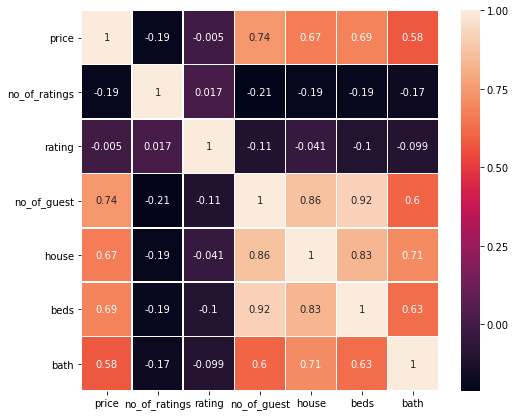

In [56]:
#Correlation Matrix visualization

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,7)) 
corrMatrix = airbnbdfClean.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# write the cleaned data to csv for data analysis

airbnbdfClean.to_csv('airbnbdfClean_Paris.csv')